In [1]:
import pandas as pd
import numpy as np
import my_def
import my_def3

<h1>데이터확인 및 가공</h1>
2분기 뒤 타겟값 매칭

In [2]:
df = pd.read_csv('Merged_Sales_data_v2.6(shift2).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65647 entries, 0 to 65646
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   년분기         65647 non-null  int64  
 1   행정동         65647 non-null  object 
 2   업종별카테고리     65647 non-null  object 
 3   월매출(점포)     65647 non-null  int64  
 4   인구수         65647 non-null  float64
 5   지역생활인구      65647 non-null  float64
 6   장기외국인       65647 non-null  float64
 7   단기외국인       65647 non-null  float64
 8   주차장면적(면)    65647 non-null  float64
 9   주차장개수(개소)   65647 non-null  float64
 10  학교수         65647 non-null  float64
 11  학생수         65647 non-null  float64
 12  버스정류장수      65647 non-null  float64
 13  년분기_미룸      65647 non-null  float64
 14  월매출_shift2  65647 non-null  float64
dtypes: float64(11), int64(2), object(2)
memory usage: 7.5+ MB


In [4]:
check_data = df[(df["행정동"] == "가락1동") & (df["업종별카테고리"] == "생활서비스")]
check_data.head(5)

,년분기,행정동,업종별카테고리,월매출(점포),인구수,지역생활인구,장기외국인,단기외국인,주차장면적(면),주차장개수(개소),학교수,학생수,버스정류장수,년분기_미룸,월매출_shift2
0,20191,가락1동,생활서비스,3975118,20186.0,523724.0,13892.0,1772.0,20942.0,83.0,3.0,1586.0,14.0,20193.0,1351685.0
3279,20192,가락1동,생활서비스,1526096,26063.0,663499.0,13194.0,1985.0,20942.0,83.0,3.0,1586.0,14.0,20194.0,668575.0
6561,20193,가락1동,생활서비스,1351685,27207.0,680319.0,14670.0,2080.0,20942.0,83.0,3.0,1780.0,14.0,20201.0,302797.0
9842,20194,가락1동,생활서비스,668575,27716.0,699589.0,13726.0,3373.0,20942.0,83.0,3.0,1780.0,14.0,20202.0,2652501.0
13122,20201,가락1동,생활서비스,302797,28032.0,722584.0,13916.0,3465.0,20268.0,57.0,3.0,2090.0,14.0,20203.0,3839465.0


In [5]:
df.columns

Index(['년분기', '행정동', '업종별카테고리', '월매출(점포)', '인구수', '지역생활인구', '장기외국인', '단기외국인',
       '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수', '년분기_미룸',
       '월매출_shift2'],
      dtype='object')

In [6]:
col = ['년분기', '행정동', '업종별카테고리', '인구수', '지역생활인구', '장기외국인', '단기외국인',
       '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수',
       '월매출_shift2']
df = df[col]

In [7]:
df.columns = ['년분기', '행정동', '업종별카테고리', '인구수', '지역생활인구', '장기외국인', '단기외국인', '주차장면적(면)',
       '주차장개수(개소)', '학교수', '학생수', '버스정류장수', '월매출(점포)']

In [8]:
col = ['년분기', '인구수', '지역생활인구', '장기외국인', '단기외국인', '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수', '월매출(점포)']
df[col] = df[col].astype(int)

In [9]:
df = my_def.reduce_memory_usage(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65647 entries, 0 to 65646
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   년분기        65647 non-null  int16 
 1   행정동        65647 non-null  object
 2   업종별카테고리    65647 non-null  object
 3   인구수        65647 non-null  int32 
 4   지역생활인구     65647 non-null  int32 
 5   장기외국인      65647 non-null  int32 
 6   단기외국인      65647 non-null  int32 
 7   주차장면적(면)   65647 non-null  int32 
 8   주차장개수(개소)  65647 non-null  int16 
 9   학교수        65647 non-null  int16 
 10  학생수        65647 non-null  int16 
 11  버스정류장수     65647 non-null  int16 
 12  월매출(점포)    65647 non-null  int64 
dtypes: int16(5), int32(5), int64(1), object(2)
memory usage: 3.4+ MB
None


In [10]:
df[df["업종별카테고리"] == "기타"]

,년분기,행정동,업종별카테고리,인구수,지역생활인구,장기외국인,단기외국인,주차장면적(면),주차장개수(개소),학교수,학생수,버스정류장수,월매출(점포)


<h1>선형회귀 전체업종 적용</h1>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# '행정동'과 '업종별 카테고리' 컬럼 원핫 인코딩 수행
df2 = pd.get_dummies(df, columns=['행정동', '업종별카테고리'], drop_first=True)

# 피처와 타겟 설정
features = (
    ['년분기', '인구수', '지역생활인구', '장기외국인', '단기외국인', 
     '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수'] +
    [col for col in df2.columns if col.startswith('행정동_') or col.startswith('업종별카테고리_')]
)
target = '월매출(점포)'

X = df2[features]
y = df2[target]

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습 및 예측
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 평가 호출
my_def.evaluate_model(model, X_train, X_test, y_train, y_test)


{'train_mse': np.float64(4.573330813444138e+16),
 'test_mse': np.float64(4.865962267713436e+16),
 'train_rmse': np.float64(213853473.52),
 'test_rmse': np.float64(220589262.38),
 'train_r2': 0.47,
 'test_r2': 0.43,
 'train_mae': np.float64(115314022.96),
 'test_mae': np.float64(116905614.41),
 'train_mae_ratio': np.float64(53.19),
 'test_mae_ratio': np.float64(53.59)}

<h1>선형회귀 전체업종 적용 - PolynomialFeatures</h1>

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# '행정동'과 '업종별 카테고리' 컬럼 원핫 인코딩 수행
categorical_features = ['행정동', '업종별카테고리']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 수치형 피처 선택
numerical_features = ['년분기', '인구수', '지역생활인구', '장기외국인', '단기외국인',
                      '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수']

# 수치형 피처에 대해 폴리노미얼 피처 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_poly = poly.fit_transform(df[numerical_features])

# 폴리노미얼 피처 이름 생성
poly_feature_names = poly.get_feature_names_out(numerical_features)

# 폴리노미얼 피처를 데이터프레임으로 변환
numerical_poly_df = pd.DataFrame(numerical_poly, columns=poly_feature_names, index=df.index)

# 수치형(폴리노미얼) 데이터와 카테고리 데이터를 결합
processed_df = pd.concat([numerical_poly_df, df_encoded.drop(columns=numerical_features + [target])], axis=1)

# 피처와 타겟 설정
features = processed_df.columns.tolist()
target = '월매출(점포)'

X = processed_df[features]
y = df[target]

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습 및 예측
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 평가 호출
my_def.evaluate_model(model, X_train, X_test, y_train, y_test)

{'train_mse': np.float64(4.62087950829865e+16),
 'test_mse': np.float64(4.849144821183939e+16),
 'train_rmse': np.float64(214962310.84),
 'test_rmse': np.float64(220207738.76),
 'train_r2': 0.46,
 'test_r2': 0.44,
 'train_mae': np.float64(116712311.05),
 'test_mae': np.float64(118068447.42),
 'train_mae_ratio': np.float64(53.84),
 'test_mae_ratio': np.float64(54.12)}

<h1>랜덤포레스트 전체업종</h1>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# '행정동'과 '업종별 카테고리' 컬럼 원핫 인코딩 수행
df2 = pd.get_dummies(df, columns=['행정동', '업종별카테고리'], drop_first=True)

# 피처와 타겟 설정
features = (
    ['년분기', '인구수', '지역생활인구', '장기외국인', '단기외국인', 
     '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수'] +
    [col for col in df2.columns if col.startswith('행정동_') or col.startswith('업종별카테고리_')]
)
target = '월매출(점포)'

X = df2[features]
y = df2[target]

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습 및 예측
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 평가 호출
my_def.evaluate_model(model, X_train, X_test, y_train, y_test)


{'train_mse': np.float64(625052302606478.8),
 'test_mse': np.float64(4154839513969667.0),
 'train_rmse': np.float64(25001046.03),
 'test_rmse': np.float64(64458044.6),
 'train_r2': 0.99,
 'test_r2': 0.95,
 'train_mae': np.float64(11354278.12),
 'test_mae': np.float64(30243789.17),
 'train_mae_ratio': np.float64(5.24),
 'test_mae_ratio': np.float64(13.86)}

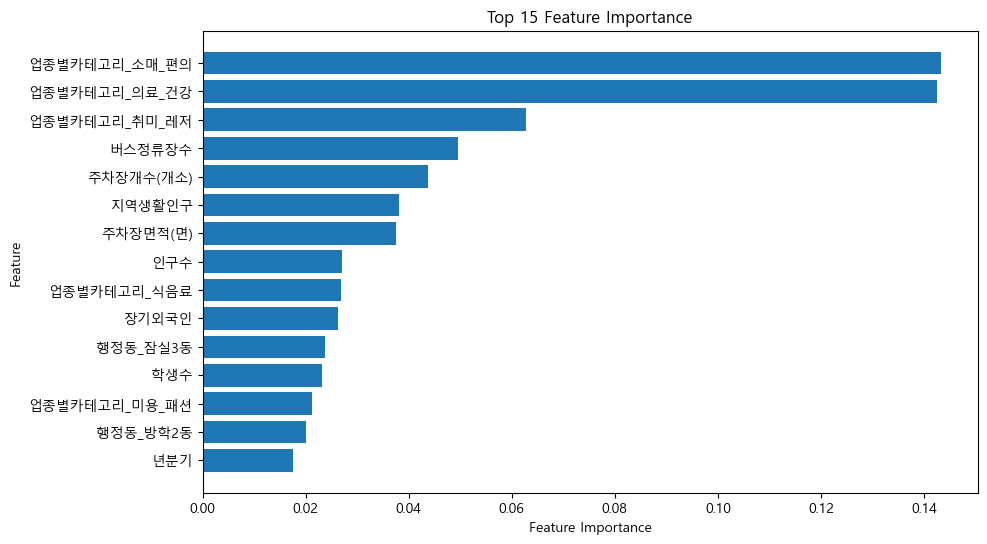

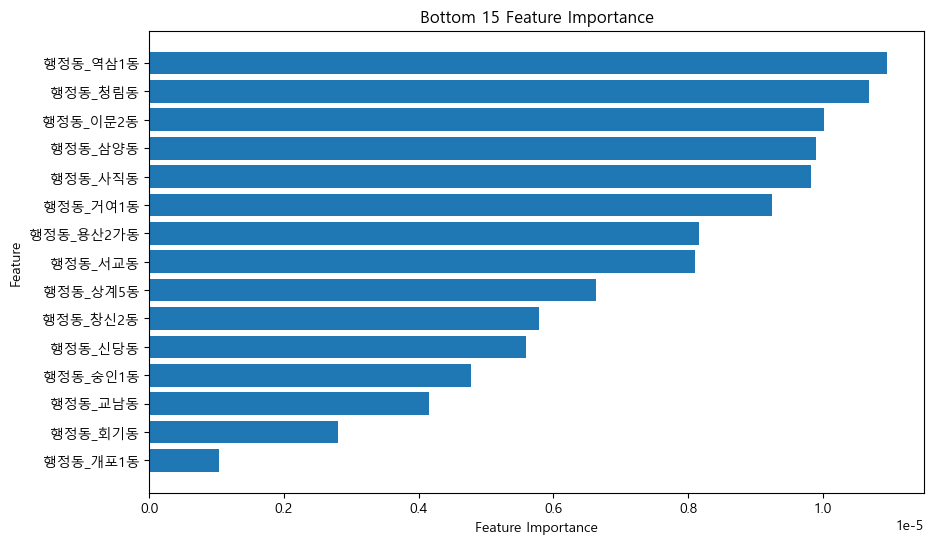

In [14]:
result_df = my_def3.plot_feature_importance(model, feature_names=X.columns.tolist(), top_n=15)

In [16]:
result_df.head(5)

,Feature,Importance
436,업종별카테고리_소매_편의,0.143267
438,업종별카테고리_의료_건강,0.142522
439,업종별카테고리_취미_레저,0.062817
9,버스정류장수,0.049636
6,주차장개수(개소),0.043829


<h1>랜덤포레스트 - PolynomialFeatures</h1>

In [ ]:
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

# '행정동'과 '업종별 카테고리' 컬럼 원핫 인코딩 수행
categorical_features = ['행정동', '업종별카테고리']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 수치형 피처 선택
numerical_features = ['년분기', '인구수', '지역생활인구', '장기외국인', '단기외국인',
                      '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수']

# 수치형 피처에 대해 폴리노미얼 피처 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_poly = poly.fit_transform(df[numerical_features])

# 폴리노미얼 피처 이름 생성
poly_feature_names = poly.get_feature_names_out(numerical_features)

# 폴리노미얼 피처를 데이터프레임으로 변환
numerical_poly_df = pd.DataFrame(numerical_poly, columns=poly_feature_names, index=df.index)

# 수치형(폴리노미얼) 데이터와 카테고리 데이터를 결합
processed_df = pd.concat([numerical_poly_df, df_encoded.drop(columns=numerical_features)], axis=1)

# 피처와 타겟 설정
features = processed_df.columns.tolist()  # 모든 변환된 피처 포함
target = '월매출(점포)'

X = processed_df[features]
y = df[target]

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습 및 예측
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 평가 호출
my_def.evaluate_model(model, X_train, X_test, y_train, y_test)
"""

{'train_mse': np.float64(5446589447767.84),
 'test_mse': np.float64(19776430319000.88),
 'train_rmse': np.float64(2333792.93),
 'test_rmse': np.float64(4447069.86),
 'train_r2': 1.0,
 'test_r2': 1.0,
 'train_mae': np.float64(62854.63),
 'test_mae': np.float64(150071.86),
 'train_mae_ratio': np.float64(0.03),
 'test_mae_ratio': np.float64(0.07)}

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

# '행정동'과 '업종별 카테고리' 컬럼 원핫 인코딩 수행
categorical_features = ['행정동', '업종별카테고리']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 수치형 피처 선택
numerical_features = ['년분기', '인구수', '지역생활인구', '장기외국인', '단기외국인',
                      '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수']

# 수치형 피처에 대해 폴리노미얼 피처 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_poly = poly.fit_transform(df[numerical_features])

# 폴리노미얼 피처 이름 생성
poly_feature_names = poly.get_feature_names_out(numerical_features)

# 폴리노미얼 피처를 데이터프레임으로 변환
numerical_poly_df = pd.DataFrame(numerical_poly, columns=poly_feature_names, index=df.index)

# 수치형(폴리노미얼) 데이터와 카테고리 데이터를 결합
processed_df = pd.concat([numerical_poly_df, df_encoded.drop(columns=numerical_features + [target])], axis=1)

# 피처와 타겟 설정
features = processed_df.columns.tolist()  # 모든 변환된 피처 포함
target = '월매출(점포)'

X = processed_df[features]
y = df[target]

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습 및 예측
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 평가 호출
my_def.evaluate_model(model, X_train, X_test, y_train, y_test)


{'train_mse': np.float64(807391543550742.5),
 'test_mse': np.float64(5309230439946061.0),
 'train_rmse': np.float64(28414636.08),
 'test_rmse': np.float64(72864466.24),
 'train_r2': 0.99,
 'test_r2': 0.94,
 'train_mae': np.float64(12484337.48),
 'test_mae': np.float64(32873542.76),
 'train_mae_ratio': np.float64(5.76),
 'test_mae_ratio': np.float64(15.07)}

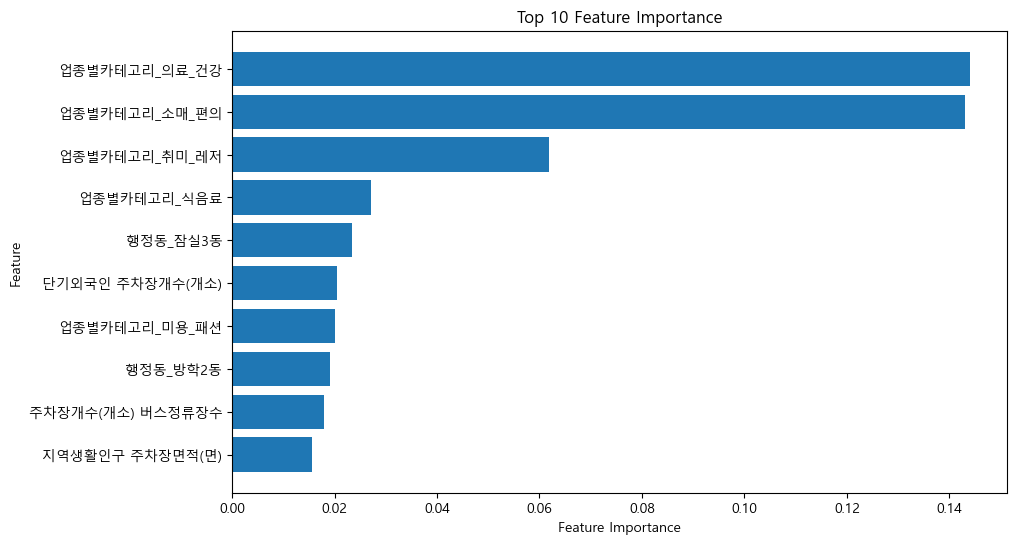

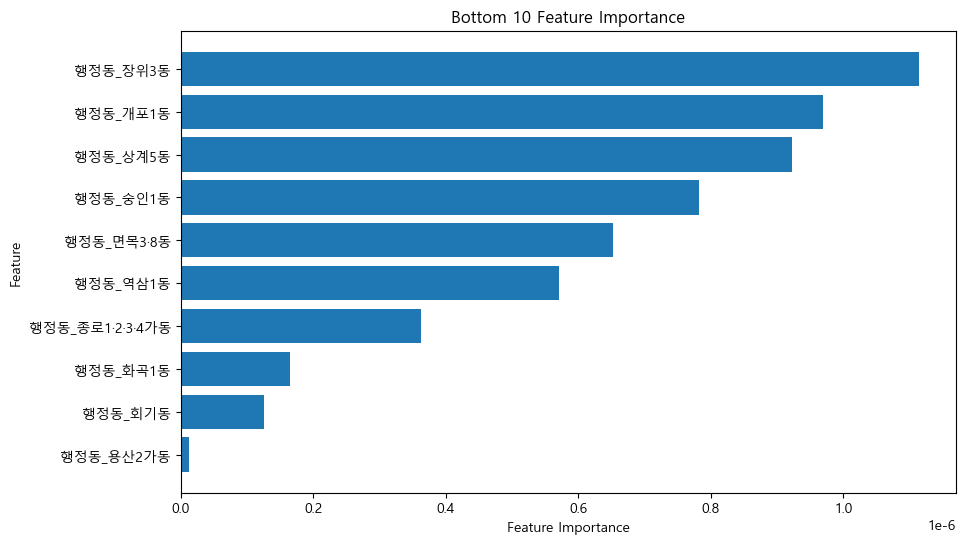

In [18]:
result_df = my_def3.plot_feature_importance(model, feature_names=X.columns.tolist(), top_n=10)

In [19]:
result_df.head(5)

,Feature,Importance
493,업종별카테고리_의료_건강,0.144038
491,업종별카테고리_소매_편의,0.142983
494,업종별카테고리_취미_레저,0.061886
492,업종별카테고리_식음료,0.027034
395,행정동_잠실3동,0.023468


<h1>랜덤포레스트 특성 선택</h1>
feature : 1개씩 삭제 후 평가 진행<br>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 평가 결과 저장용 리스트
results = []

# 기본 피처 리스트
base_features = [
    '년분기', '인구수', '지역생활인구', '장기외국인', '단기외국인',
    '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수'
]

# 하나씩 피처를 제외하고 모델 학습 및 평가
for feature_to_remove in base_features:
    # 제외할 피처를 설정
    selected_features = [f for f in base_features if f != feature_to_remove] + \
                        [col for col in df2.columns if col.startswith('행정동_') or col.startswith('업종별카테고리_')]

    # 학습 데이터 준비
    X = df2[selected_features]
    y = df2[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 모델 학습
    model = RandomForestRegressor(n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # 평가 메트릭 계산
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae_ratio = mean_absolute_error(y_train, y_train_pred) / y_train.mean() * 100
    test_mae_ratio = mean_absolute_error(y_test, y_test_pred) / y_test.mean() * 100

    # 결과 저장
    results.append({
        'Feature Removed': f'{feature_to_remove}(-)',
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train MAE Ratio (%)': train_mae_ratio,
        'Test MAE Ratio (%)': test_mae_ratio
    })

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 결과 출력
results_df


In [ ]:
# 피쳐 하나씩 뺏을때 랜덤포레스트 성능 평가
results_df.sort_values(by="Test MAE Ratio (%)", ascending=True)

,Feature Removed,Train R2,Test R2,Train MAE Ratio (%),Test MAE Ratio (%)
4,단기외국인(-),0.992612,0.949204,5.132205,13.657122
2,지역생활인구(-),0.992778,0.948743,5.113111,13.662345
8,학생수(-),0.992444,0.949404,5.194525,13.748624
3,장기외국인(-),0.992373,0.951801,5.200775,13.789642
1,인구수(-),0.992576,0.950587,5.192034,13.825615
5,주차장면적(면)(-),0.992746,0.950129,5.216050,13.887526
7,학교수(-),0.992395,0.949289,5.254963,13.952432
0,년분기(-),0.992163,0.947006,5.293756,14.108624
6,주차장개수(개소)(-),0.992069,0.949735,5.373121,14.218126
9,버스정류장수(-),0.991438,0.945229,5.382195,14.258690


<h1>랜덤포레스트 하이퍼 파라미터 1차 조정</h1>
feature : 단기외국인 삭제<br>
n_estimators : 300

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# '행정동'과 '업종별 카테고리' 컬럼 원핫 인코딩 수행
df2 = pd.get_dummies(df, columns=['행정동', '업종별카테고리'], drop_first=True)

# 피처와 타겟 설정
features = (
    ['년분기', '인구수', '지역생활인구', '장기외국인', 
     '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수'] +
    [col for col in df2.columns if col.startswith('행정동_') or col.startswith('업종별카테고리_')]
)
target = '월매출(점포)'

X = df2[features]
y = df2[target]

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습 및 예측
model = RandomForestRegressor(n_estimators= 300, n_jobs= -1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 평가 호출
my_def.evaluate_model(model, X_train, X_test, y_train, y_test)


{'train_mse': np.float64(602356794412602.5),
 'test_mse': np.float64(4250289983762827.0),
 'train_rmse': np.float64(24542958.14),
 'test_rmse': np.float64(65194248.09),
 'train_r2': 0.99,
 'test_r2': 0.95,
 'train_mae': np.float64(10906757.99),
 'test_mae': np.float64(29488150.34),
 'train_mae_ratio': np.float64(5.03),
 'test_mae_ratio': np.float64(13.52)}

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# '행정동'과 '업종별 카테고리' 컬럼 원핫 인코딩 수행
df2 = pd.get_dummies(df, columns=['행정동', '업종별카테고리'], drop_first=True)

# 피처와 타겟 설정
features = (
    ['년분기', '인구수', '지역생활인구', '장기외국인', 
     '주차장면적(면)', '주차장개수(개소)', '학교수', '학생수', '버스정류장수'] +
    [col for col in df2.columns if col.startswith('행정동_') or col.startswith('업종별카테고리_')]
)
target = '월매출(점포)'

X = df2[features]
y = df2[target]

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습 및 예측
model = RandomForestRegressor(n_estimators= 500, n_jobs= -1, max_depth= 50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 모델 평가 호출
my_def.evaluate_model(model, X_train, X_test, y_train, y_test)


{'train_mse': np.float64(660646829831419.8),
 'test_mse': np.float64(4316119830188530.0),
 'train_rmse': np.float64(25703050.98),
 'test_rmse': np.float64(65697182.82),
 'train_r2': 0.99,
 'test_r2': 0.95,
 'train_mae': np.float64(12755168.84),
 'test_mae': np.float64(30441328.56),
 'train_mae_ratio': np.float64(5.88),
 'test_mae_ratio': np.float64(13.95)}